In [ ]:
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
import pandas as pd

In [ ]:
reviews_dataset = pd.read_csv("reviews_preprocessed.csv")

In [ ]:
len(reviews_dataset)

11879

In [ ]:
#reviews_dataset = reviews_dataset[reviews_dataset["word_count"]>2]
print("1 star rating count: " ,len(reviews_dataset[reviews_dataset["score"] == 0]),"\n")
print("2 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 1]),"\n")
print("3 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 2]),"\n")
print("4 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 3]),"\n")
print("5 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 4]),"\n")

1 star rating count:  2336 

2 stars rating count:  2337 

3 stars rating count:  2391 

4 stars rating count:  2391 

5 stars rating count:  2424 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


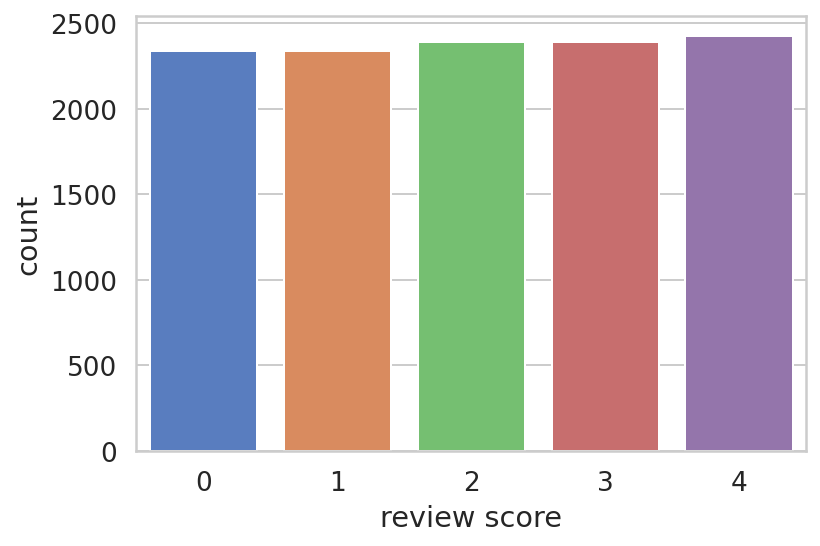

In [ ]:
sns.countplot(reviews_dataset.score)
plt.xlabel('review score');

In [ ]:
reviews_dataset.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000


In [ ]:
reviews_dataset["more_than_1_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 1) else 0)

In [ ]:
reviews_dataset["more_than_2_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 2) else 0)

In [ ]:
reviews_dataset["more_than_3_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 3) else 0)

In [ ]:
reviews_dataset["more_than_4_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 4) else 0)

In [ ]:
reviews_dataset.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity,more_than_1_star,more_than_2_star,more_than_3_star,more_than_4_star
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481,0,0,0,0
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000,0,0,0,0
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000,0,0,0,0
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000,0,0,0,0
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into training and testing data
x = reviews_dataset['content']
y = reviews_dataset[['score', 'more_than_1_star', 'more_than_2_star', 'more_than_3_star', 'more_than_4_star']]
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.16, random_state=42)

##### Classifier 1

In [ ]:
# Split into training and testing data
y1 = y['more_than_1_star']

In [ ]:
y1_test = y_test['more_than_1_star']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [ ]:
params={ 
        'count_vect__max_df': [0.5, 1.0],
        'clf__C':[1.0, 50.0],
        'clf__kernel':['linear', 'poly', 'rbf']
       }

In [ ]:
classifier_pipline1 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', svm.SVC(probability=True))
                      ]
                    )
classifier_pipline1

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid1 = GridSearchCV(classifier_pipline1, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid1

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid1.fit(x, y1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 55.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'SVM_ordinal1.sav'
#pickle.dump(grid1, open(filename, 'wb'))

In [ ]:
filename = 'SVM_ordinal1.sav'
grid1 = pickle.load(open(filename, 'rb'))
result = grid1.score(x_test, y1_test)
print(result)

0.8290373487638085


In [ ]:
best_model1= grid1.best_estimator_
best_model1

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
best_model1["clf"].classes_

array([0, 1])

In [ ]:
grid1.best_score_

0.8207056217698556

In [ ]:
grid1.best_params_

{'clf__C': 1.0, 'clf__kernel': 'rbf', 'count_vect__max_df': 1.0}

In [ ]:
score1 = grid1.score(x_test, y1_test)
score1

0.8290373487638085

In [ ]:
y1_pred = grid1.predict(x_test)

In [ ]:
y1_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy1 = accuracy_score(y1_test, y1_pred)
accuracy1

0.8290373487638085

In [ ]:
# https://github.com/reiinakano/scikit-plot/issues/87
#y1_pred_proba = grid1.decision_function(x_test)
#y1_pred_proba

In [ ]:
y1_pred_proba = grid1.predict_proba(x_test)
y1_pred_proba

array([[0.00536386, 0.99463614],
       [0.07432493, 0.92567507],
       [0.27273558, 0.72726442],
       ...,
       [0.33175441, 0.66824559],
       [0.10009437, 0.89990563],
       [0.03076226, 0.96923774]])

In [ ]:
y1_pred_proba = y1_pred_proba[:,1]
y1_pred_proba

array([0.99463614, 0.92567507, 0.72726442, ..., 0.66824559, 0.89990563,
       0.96923774])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid1.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid1.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision1 = precision_score(y1_test, y1_pred)

In [ ]:
precision1

0.8313120176405733

In [ ]:
recall1 = recall_score(y1_test, y1_pred)

In [ ]:
recall1

0.9875573018991487

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score1 = f1_score(y1_test, y1_pred)
f1_score1

0.9027237354085602

In [ ]:
conf_mx1 = confusion_matrix(y1_test, y1_pred)
conf_mx1

array([[  68,  306],
       [  19, 1508]])

##### Classifier 2

In [ ]:
y2 = y['more_than_2_star']
y2_test = y_test['more_than_2_star']

In [ ]:
classifier_pipline2 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', svm.SVC(probability=True))
                      ]
                    )
classifier_pipline2

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
grid2 = GridSearchCV(classifier_pipline2, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid2

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid2.fit(x, y2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 70.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
# save the model to disk
filename = 'SVM_ordinal2.sav'
pickle.dump(grid2, open(filename, 'wb'))

In [ ]:
filename = 'SVM_ordinal2.sav'
grid2 = pickle.load(open(filename, 'rb'))
result = grid2.score(x_test, y2_test)
print(result)

0.7822198842714361


In [ ]:
best_model2= grid2.best_estimator_
best_model2

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
#best_model2["clf"].class_count_

In [ ]:
best_model2["clf"].classes_

array([0, 1])

In [ ]:
grid2.best_score_

0.7769090562076535

In [ ]:
grid2.best_params_

{'clf__C': 1.0, 'clf__kernel': 'rbf', 'count_vect__max_df': 0.5}

In [ ]:
score2 = grid2.score(x_test, y2_test)
score2

0.7822198842714361

In [ ]:
y2_pred = grid2.predict(x_test)
y2_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy2 = accuracy_score(y2_test, y2_pred)
accuracy2

0.7822198842714361

In [ ]:
y2_pred_proba = grid2.predict_proba(x_test)
y2_pred_proba

array([[1.67107975e-06, 9.99998329e-01],
       [5.65647284e-01, 4.34352716e-01],
       [7.81913119e-01, 2.18086881e-01],
       ...,
       [7.83046572e-01, 2.16953428e-01],
       [4.18974625e-01, 5.81025375e-01],
       [1.71949827e-02, 9.82805017e-01]])

In [ ]:
y2_pred_proba = y2_pred_proba[:,1]
y2_pred_proba

array([0.99999833, 0.43435272, 0.21808688, ..., 0.21695343, 0.58102538,
       0.98280502])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid2.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid2.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
precision2 = precision_score(y2_test, y2_pred)

In [ ]:
precision2

0.8155422715627668

In [ ]:
recall2 = recall_score(y2_test, y2_pred)

In [ ]:
recall2

0.8282740676496098

In [ ]:
f1_score2 = f1_score(y2_test, y2_pred)
f1_score2

0.8218588640275387

In [ ]:
conf_mx2 = confusion_matrix(y2_test, y2_pred)
conf_mx2

array([[532, 216],
       [198, 955]])

##### Classifier 3

In [ ]:
y3 = y['more_than_3_star']
y3_test = y_test['more_than_3_star']

In [ ]:
classifier_pipline3 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', svm.SVC(probability=True))
                      ]
                    )
classifier_pipline3

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
grid3 = GridSearchCV(classifier_pipline3, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid3

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid3.fit(x, y3)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 59.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
# save the model to disk
filename = 'SVM_ordinal3.sav'
pickle.dump(grid3, open(filename, 'wb'))

In [ ]:
filename = 'SVM_ordinal3.sav'
grid3 = pickle.load(open(filename, 'rb'))
result = grid3.score(x_test, y3_test)
print(result)

0.8200946870068385


In [ ]:
best_model3= grid3.best_estimator_
best_model3

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
#best_model3["clf"].class_count_

In [ ]:
best_model3["clf"].classes_

array([0, 1])

In [ ]:
grid3.best_score_

0.8099819187246673

In [ ]:
grid3.best_params_

{'clf__C': 1.0, 'clf__kernel': 'rbf', 'count_vect__max_df': 0.5}

In [ ]:
score3 = grid3.score(x_test, y3_test)
score3

0.8200946870068385

In [ ]:
y3_pred = grid3.predict(x_test)
y3_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy3 = accuracy_score(y3_test, y3_pred)
accuracy3

0.8200946870068385

In [ ]:
y3_pred_proba = grid3.predict_proba(x_test)
y3_pred_proba

array([[2.92161834e-07, 9.99999708e-01],
       [8.67469938e-01, 1.32530062e-01],
       [9.53541649e-01, 4.64583507e-02],
       ...,
       [8.51531492e-01, 1.48468508e-01],
       [4.59321512e-01, 5.40678488e-01],
       [1.47390574e-02, 9.85260943e-01]])

In [ ]:
y3_pred_proba = y3_pred_proba[:,1]
y3_pred_proba

array([0.99999971, 0.13253006, 0.04645835, ..., 0.14846851, 0.54067849,
       0.98526094])

In [ ]:
grid3.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
precision3 = precision_score(y3_test, y3_pred)

In [ ]:
precision3

0.8184523809523809

In [ ]:
recall3 = recall_score(y3_test, y3_pred)

In [ ]:
recall3

0.7142857142857143

In [ ]:
f1_score3 = f1_score(y3_test, y3_pred)
f1_score3

0.7628294036061025

In [ ]:
conf_mx3 = confusion_matrix(y3_test, y3_pred)
conf_mx3

array([[1009,  122],
       [ 220,  550]])

##### Classifier 4

In [ ]:
y4 = y['more_than_4_star']
y4_test = y_test['more_than_4_star']

In [ ]:
classifier_pipline4 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', svm.SVC(probability=True))
                      ]
                    )
classifier_pipline4

In [ ]:
grid4 = GridSearchCV(classifier_pipline4, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid4

In [ ]:
grid4.fit(x, y4)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 44.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
# save the model to disk
filename = 'SVM_ordinal4.sav'
pickle.dump(grid4, open(filename, 'wb'))

In [ ]:
filename = 'SVM_ordinal4.sav'
grid4 = pickle.load(open(filename, 'rb'))
result = grid4.score(x_test, y4_test)
print(result)

0.8574434508153603


In [ ]:
best_model4= grid4.best_estimator_
best_model4

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
   

In [ ]:
#best_model4["clf"].class_count_

In [ ]:
best_model4["clf"].classes_

array([0, 1])

In [ ]:
grid4.best_score_

0.8600918629238427

In [ ]:
grid4.best_params_

{'clf__C': 1.0, 'clf__kernel': 'rbf', 'count_vect__max_df': 0.5}

In [ ]:
score4 = grid4.score(x_test, y4_test)
score4

0.8574434508153603

In [ ]:
y4_pred = grid4.predict(x_test)
y4_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy4 = accuracy_score(y4_test, y4_pred)
accuracy4

0.8574434508153603

In [ ]:
y4_pred_proba = grid4.predict_proba(x_test)
y4_pred_proba

array([[4.15755719e-06, 9.99995842e-01],
       [9.69074504e-01, 3.09254956e-02],
       [9.84304706e-01, 1.56952938e-02],
       ...,
       [8.68825293e-01, 1.31174707e-01],
       [9.72855361e-01, 2.71446391e-02],
       [2.40238793e-01, 7.59761207e-01]])

In [ ]:
y4_pred_proba = y4_pred_proba[:,1]
y4_pred_proba

array([0.99999584, 0.0309255 , 0.01569529, ..., 0.13117471, 0.02714464,
       0.75976121])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid4.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid4.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
precision4 = precision_score(y4_test, y4_pred)

In [ ]:
precision4

0.7427385892116183

In [ ]:
recall4 = recall_score(y4_test, y4_pred)

In [ ]:
recall4

0.46134020618556704

In [ ]:
f1_score4 = f1_score(y4_test, y4_pred)
f1_score4

0.5691573926868044

In [ ]:
conf_mx4 = confusion_matrix(y4_test, y4_pred)
conf_mx4

array([[1451,   62],
       [ 209,  179]])

In [ ]:
import numpy as np

In [ ]:
def ordinal_classification_predict(binary_predictions):
  classes_proba = []
  classes_proba.append(1-binary_predictions[0])
  classes_proba.append(binary_predictions[0]-binary_predictions[1])
  classes_proba.append(binary_predictions[1]-binary_predictions[2])
  classes_proba.append(binary_predictions[2]-binary_predictions[3])
  classes_proba.append(binary_predictions[3])

  return np.argmax(classes_proba)
  

In [ ]:
def ordinal_classification_predict_proba(binary_predictions):
  class1 = (1-binary_predictions[0])
  class2 = (binary_predictions[0]-binary_predictions[1])
  class3 = (binary_predictions[1]-binary_predictions[2])
  class4 = (binary_predictions[2]-binary_predictions[3])
  class5 = (binary_predictions[3])

  return [class1, class2, class3, class4, class5]

In [ ]:
y1_series = pd.Series(y1_pred_proba)
y2_series = pd.Series(y2_pred_proba)
y3_series = pd.Series(y3_pred_proba)
y4_series = pd.Series(y4_pred_proba)

binary_preds = { 'more_than_1_star': y1_series,
                 'more_than_2_star': y2_series,
                 'more_than_3_star': y3_series,
                 'more_than_4_star': y4_series}
binary_preds_df = pd.DataFrame(binary_preds)

In [ ]:
binary_preds_df.head()

,more_than_1_star,more_than_2_star,more_than_3_star,more_than_4_star
0,0.994636,0.999998,1.000000,0.999996
1,0.925675,0.434353,0.132530,0.030925
2,0.727264,0.218087,0.046458,0.015695
3,0.767125,0.389607,0.101019,0.111533
4,0.966697,0.983110,0.974646,0.769729


In [ ]:
y_pred = binary_preds_df.apply(lambda row: ordinal_classification_predict(row), axis=1)

In [ ]:
y_pred_proba = binary_preds_df.apply(lambda row: ordinal_classification_predict_proba(row), axis=1)

In [ ]:
y_pred.values

array([4, 1, 1, ..., 1, 3, 4])

In [ ]:
y_pred_proba = np.stack(y_pred_proba.values)
y_pred_proba

array([[ 5.36386233e-03, -5.36219125e-03, -1.37891792e-06,
         3.86539535e-06,  9.99995842e-01],
       [ 7.43249304e-02,  4.91322354e-01,  3.01822654e-01,
         1.01604566e-01,  3.09254956e-02],
       [ 2.72735584e-01,  5.09177535e-01,  1.71628530e-01,
         3.07630569e-02,  1.56952938e-02],
       ...,
       [ 3.31754413e-01,  4.51292160e-01,  6.84849200e-02,
         1.72938009e-02,  1.31174707e-01],
       [ 1.00094367e-01,  3.18880258e-01,  4.03468868e-02,
         5.13533849e-01,  2.71446391e-02],
       [ 3.07622627e-02, -1.35672800e-02, -2.45592533e-03,
         2.25499736e-01,  7.59761207e-01]])

In [ ]:
y_test = y_test["score"]
y_test.values

array([4, 3, 2, ..., 1, 1, 3])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.46081009994739613

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[183, 124,  46,  14,   7],
       [ 83, 154,  95,  30,  12],
       [ 50, 101, 120,  87,  25],
       [ 13,  27,  92, 170,  80],
       [  7,  18,  30,  84, 249]])

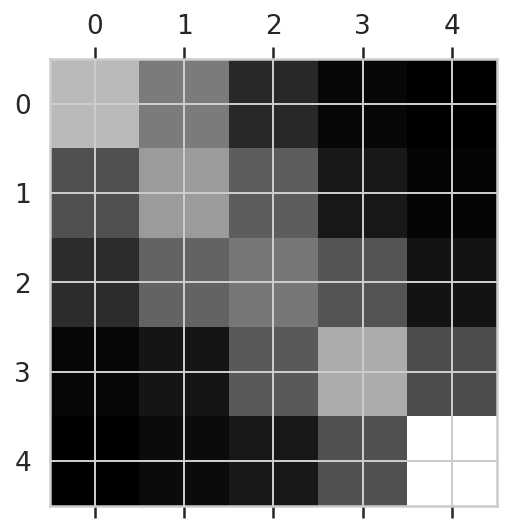

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
print(row_sums)
norm_conf_mx = conf_mx / row_sums

[[374]
 [374]
 [383]
 [382]
 [388]]


In [ ]:
norm_conf_mx

array([[0.48930481, 0.3315508 , 0.12299465, 0.03743316, 0.01871658],
       [0.22192513, 0.41176471, 0.2540107 , 0.0802139 , 0.03208556],
       [0.1305483 , 0.26370757, 0.31331593, 0.22715405, 0.06527415],
       [0.03403141, 0.07068063, 0.2408377 , 0.44502618, 0.20942408],
       [0.01804124, 0.04639175, 0.07731959, 0.21649485, 0.64175258]])

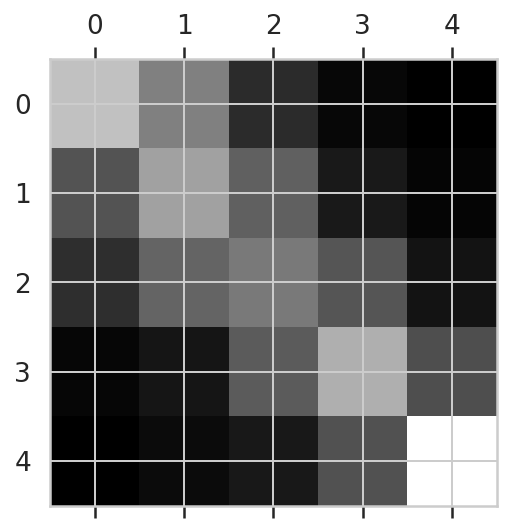

In [ ]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

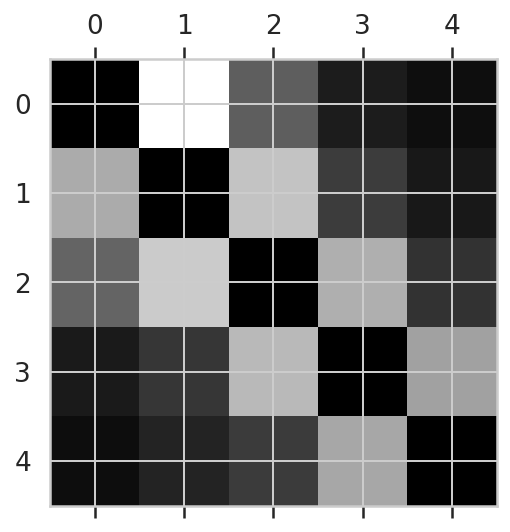

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
norm_conf_mx

array([[0.        , 0.3315508 , 0.12299465, 0.03743316, 0.01871658],
       [0.22192513, 0.        , 0.2540107 , 0.0802139 , 0.03208556],
       [0.1305483 , 0.26370757, 0.        , 0.22715405, 0.06527415],
       [0.03403141, 0.07068063, 0.2408377 , 0.        , 0.20942408],
       [0.01804124, 0.04639175, 0.07731959, 0.21649485, 0.        ]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
print(row_sums)
norm_conf_mx = conf_mx / row_sums

[[374]
 [374]
 [383]
 [382]
 [388]]


In [ ]:
np.fill_diagonal(norm_conf_mx, 0)

In [ ]:
norm_conf_mx

array([[0.        , 0.3315508 , 0.12299465, 0.03743316, 0.01871658],
       [0.22192513, 0.        , 0.2540107 , 0.0802139 , 0.03208556],
       [0.1305483 , 0.26370757, 0.        , 0.22715405, 0.06527415],
       [0.03403141, 0.07068063, 0.2408377 , 0.        , 0.20942408],
       [0.01804124, 0.04639175, 0.07731959, 0.21649485, 0.        ]])

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="f", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');


In [ ]:
class_names = ['strongly_neg','neg','neutral','pos','strongly_pos']

In [ ]:
df_norm_cm = pd.DataFrame(norm_conf_mx, index=class_names, columns=class_names)

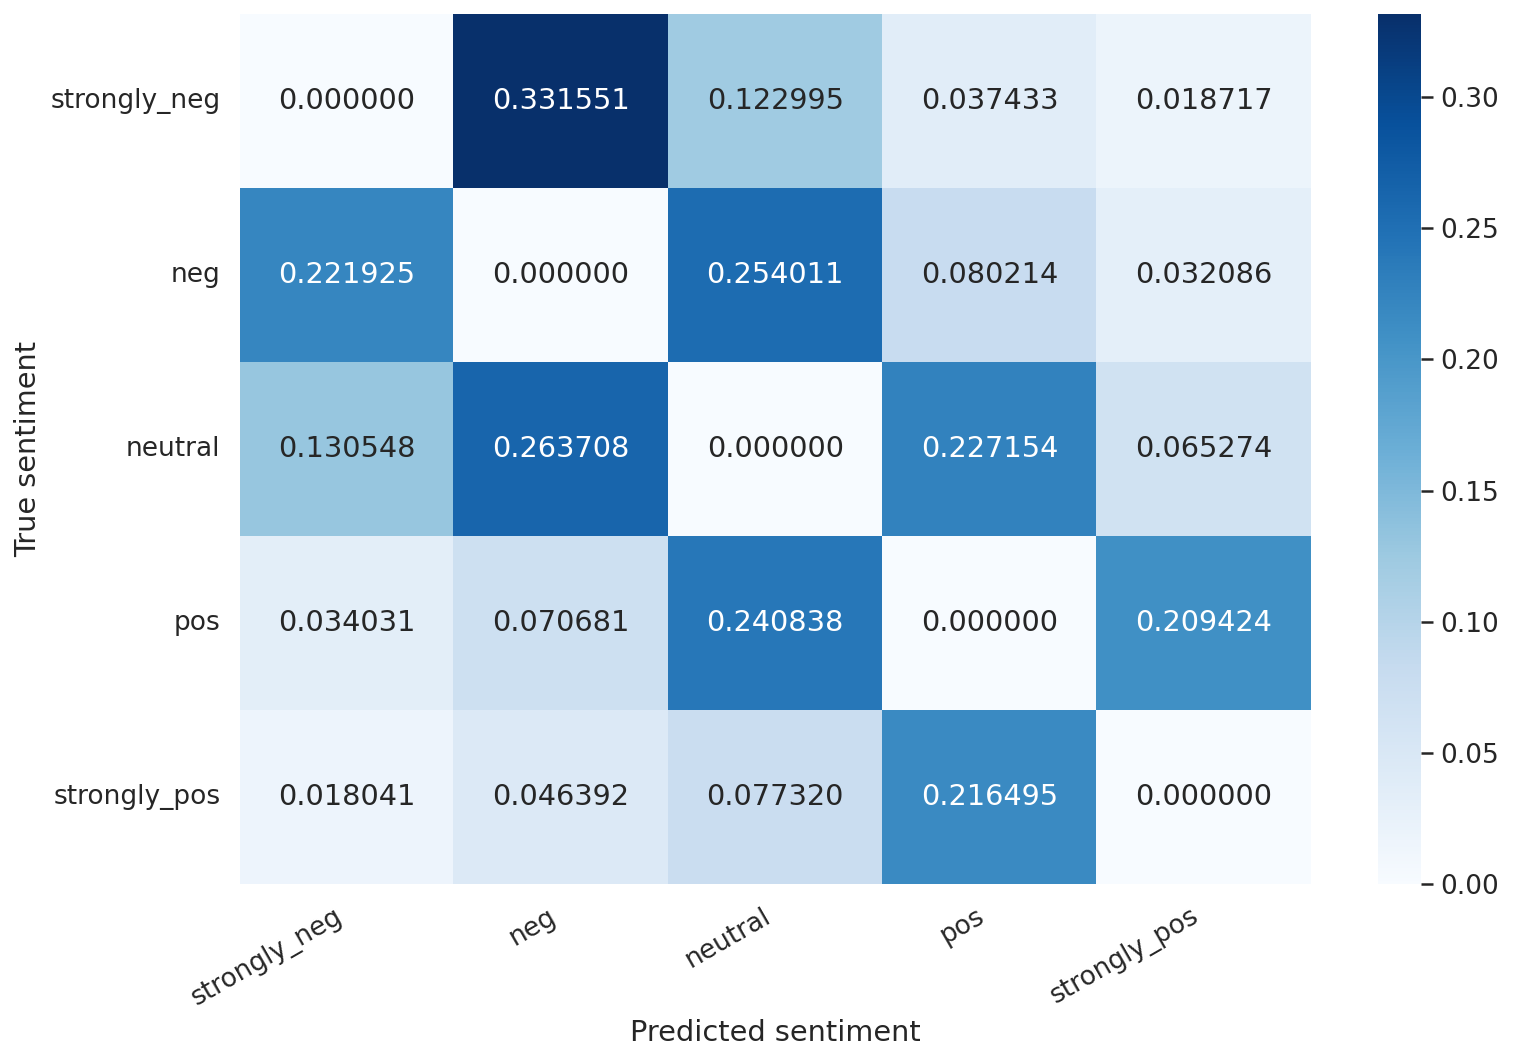

In [ ]:
show_confusion_matrix(df_norm_cm)

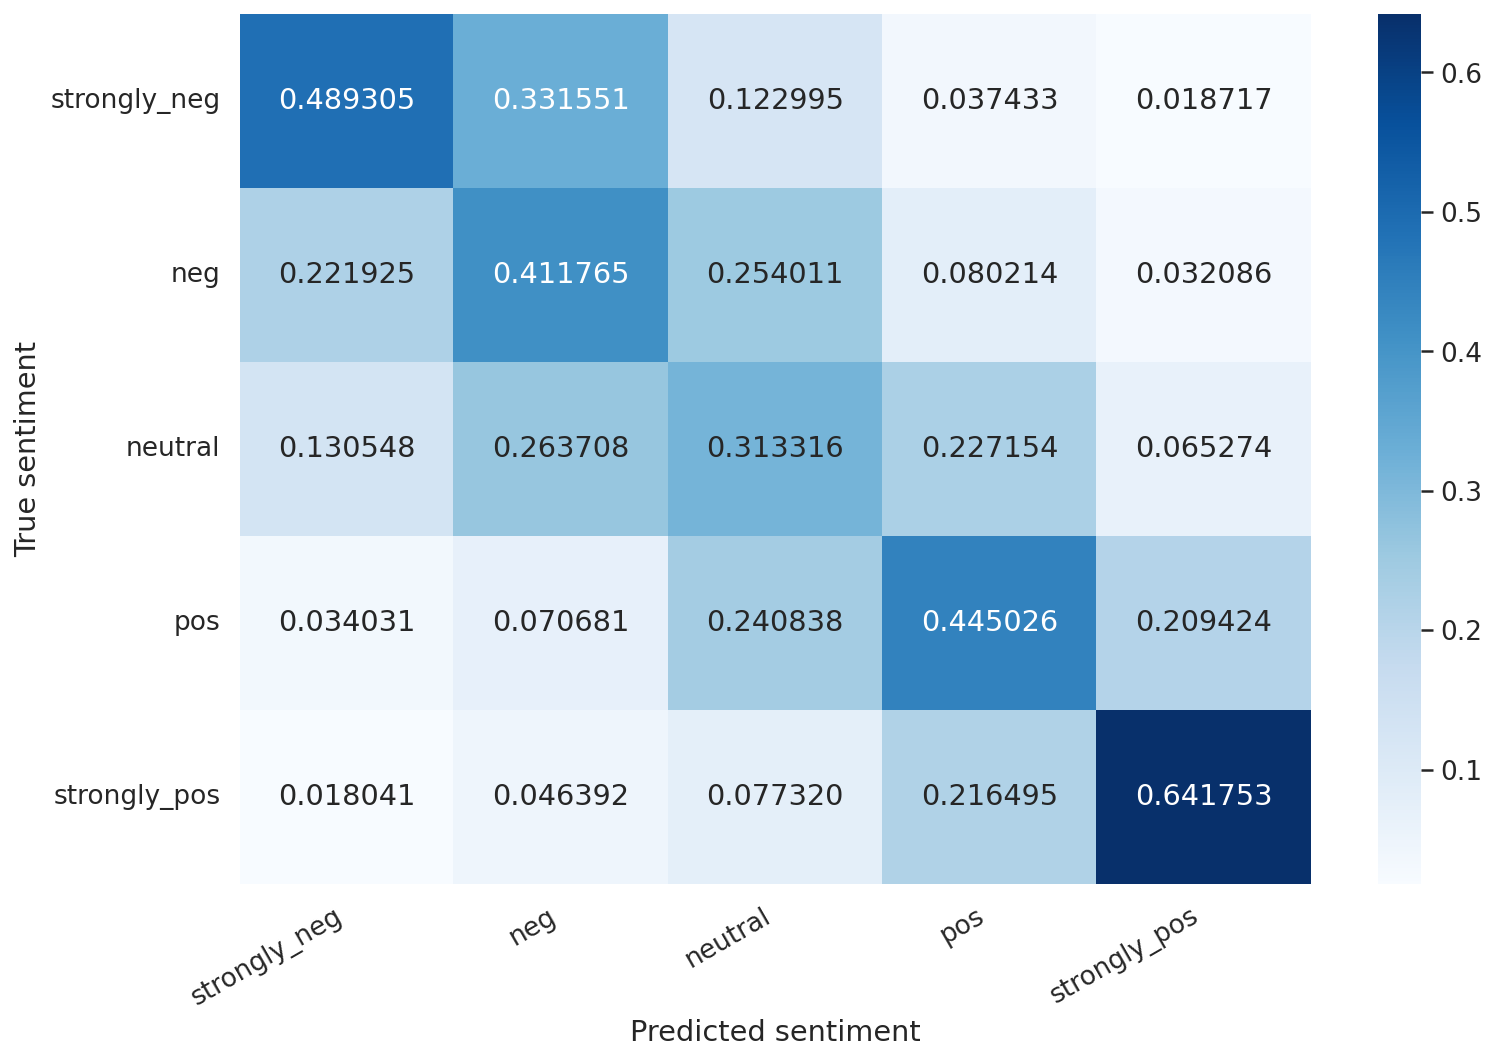

In [ ]:
show_confusion_matrix(df_norm_cm)

Precison / Recall

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Use label_binarize to be multi-label like settings
y_test_mult = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
print(y_test_mult)
print(y_pred_proba)

n_classes = y_test_mult.shape[1]
n_classes

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]
[[ 5.36386233e-03 -5.36219125e-03 -1.37891792e-06  3.86539535e-06
   9.99995842e-01]
 [ 7.43249304e-02  4.91322354e-01  3.01822654e-01  1.01604566e-01
   3.09254956e-02]
 [ 2.72735584e-01  5.09177535e-01  1.71628530e-01  3.07630569e-02
   1.56952938e-02]
 ...
 [ 3.31754413e-01  4.51292160e-01  6.84849200e-02  1.72938009e-02
   1.31174707e-01]
 [ 1.00094367e-01  3.18880258e-01  4.03468868e-02  5.13533849e-01
   2.71446391e-02]
 [ 3.07622627e-02 -1.35672800e-02 -2.45592533e-03  2.25499736e-01
   7.59761207e-01]]


5

In [ ]:
print(len(y_test_mult))
print(len(y_pred_proba))

1901
1901


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_mult[:, i],
                                                        y_pred_proba[:, i])
    
    curr_precision = precision[i]
    curr_recall = recall[i]

    precision[i] = precision[i][curr_precision+curr_recall > 0.0]
    recall[i] = recall[i][curr_precision+curr_recall > 0.0]

    average_precision[i] = average_precision_score(y_test_mult[:, i], y_pred_proba[:, i])

In [ ]:
# A "macro-average": Averaging over classes
# ====> Cannot do macro-average by the below approach because:
# len(precision[i]) depend on i (the unique probas in column i)
# the thresholds that based on it the precision & recall are calculated is not the same at the corresponding indices
#precision_sum = precision[0] + precision[1] + precision[2] + precision[3] + precision[4]
#precision["macro"] = precision_sum / 5
#recall_sum = recall[0] + recall[1] + recall[2] + recall[3] + recall[4]
#recall["macro"] = recall_sum / 5

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_mult.ravel(),
    y_pred_proba.ravel())


# compute F1 score
f1_score = dict()
# for each class
for i in range(n_classes):
  f1_score[i] = 2*((precision[i]*recall[i])/(precision[i]+recall[i]))

f1_score["micro"] = 2*((precision["micro"]*recall["micro"])/(precision["micro"]+recall["micro"]))

In [ ]:
average_precision["micro"] = average_precision_score(y_test_mult, y_pred_proba,
                                                     average="micro")
average_precision["macro"] = average_precision_score(y_test_mult, y_pred_proba,
                                                     average="macro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(average_precision["macro"]))

Average precision score, micro-averaged over all classes: 0.50
Average precision score, macro-averaged over all classes: 0.48


Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.50')

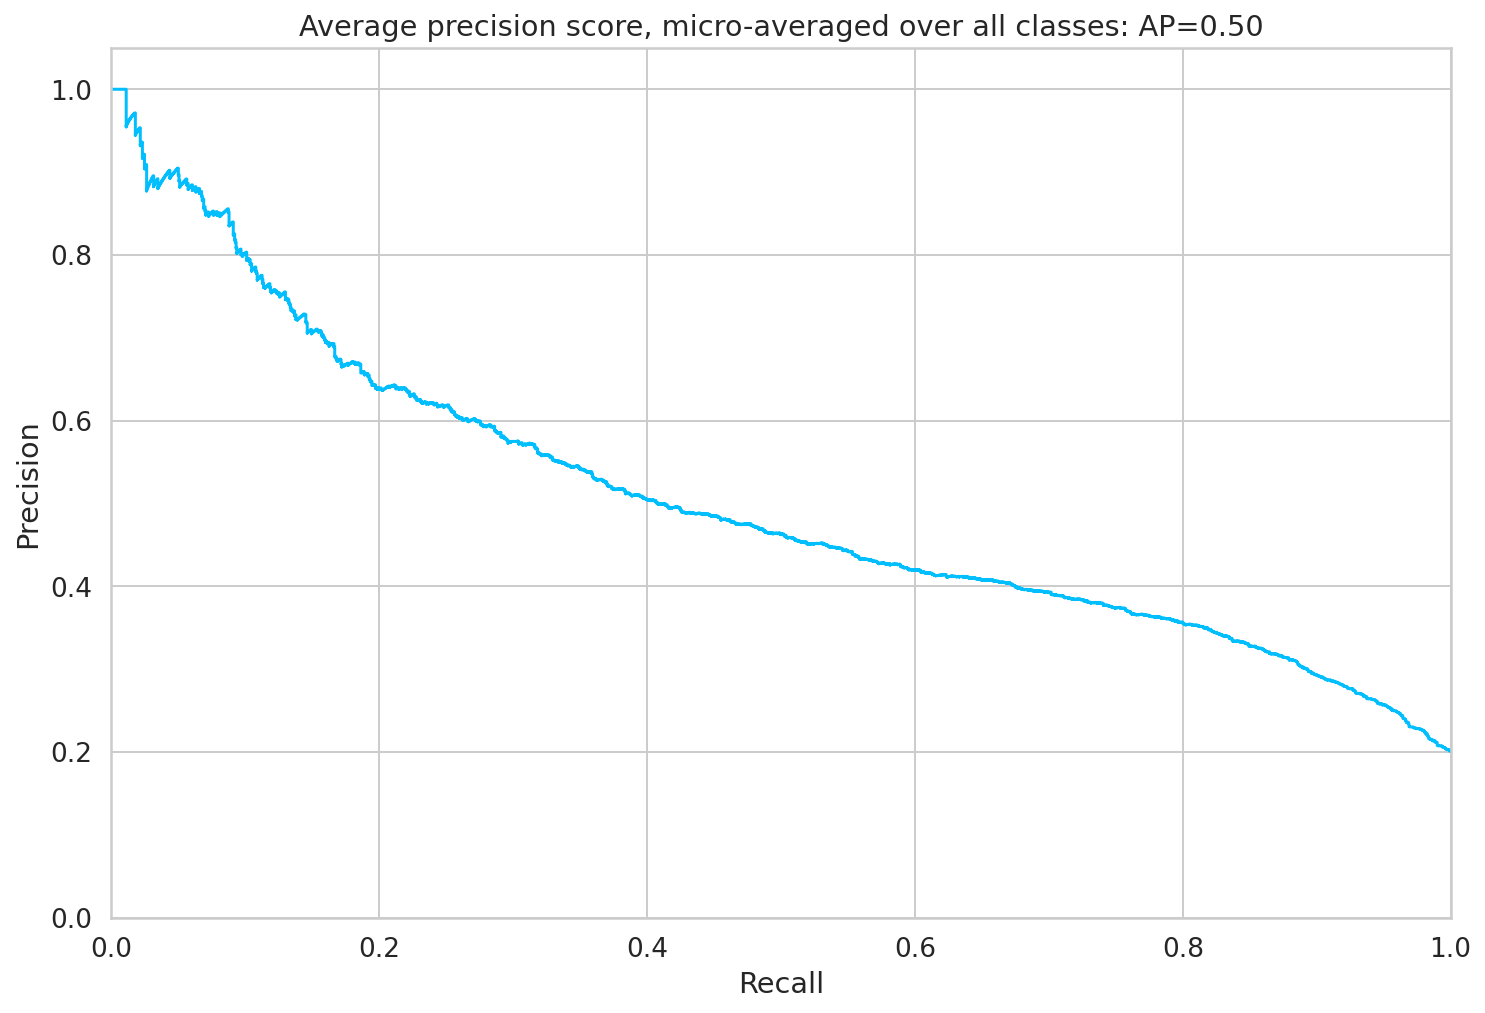

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

Plot Precision-Recall curve for each class and iso-f1 curves

In [ ]:
from itertools import cycle

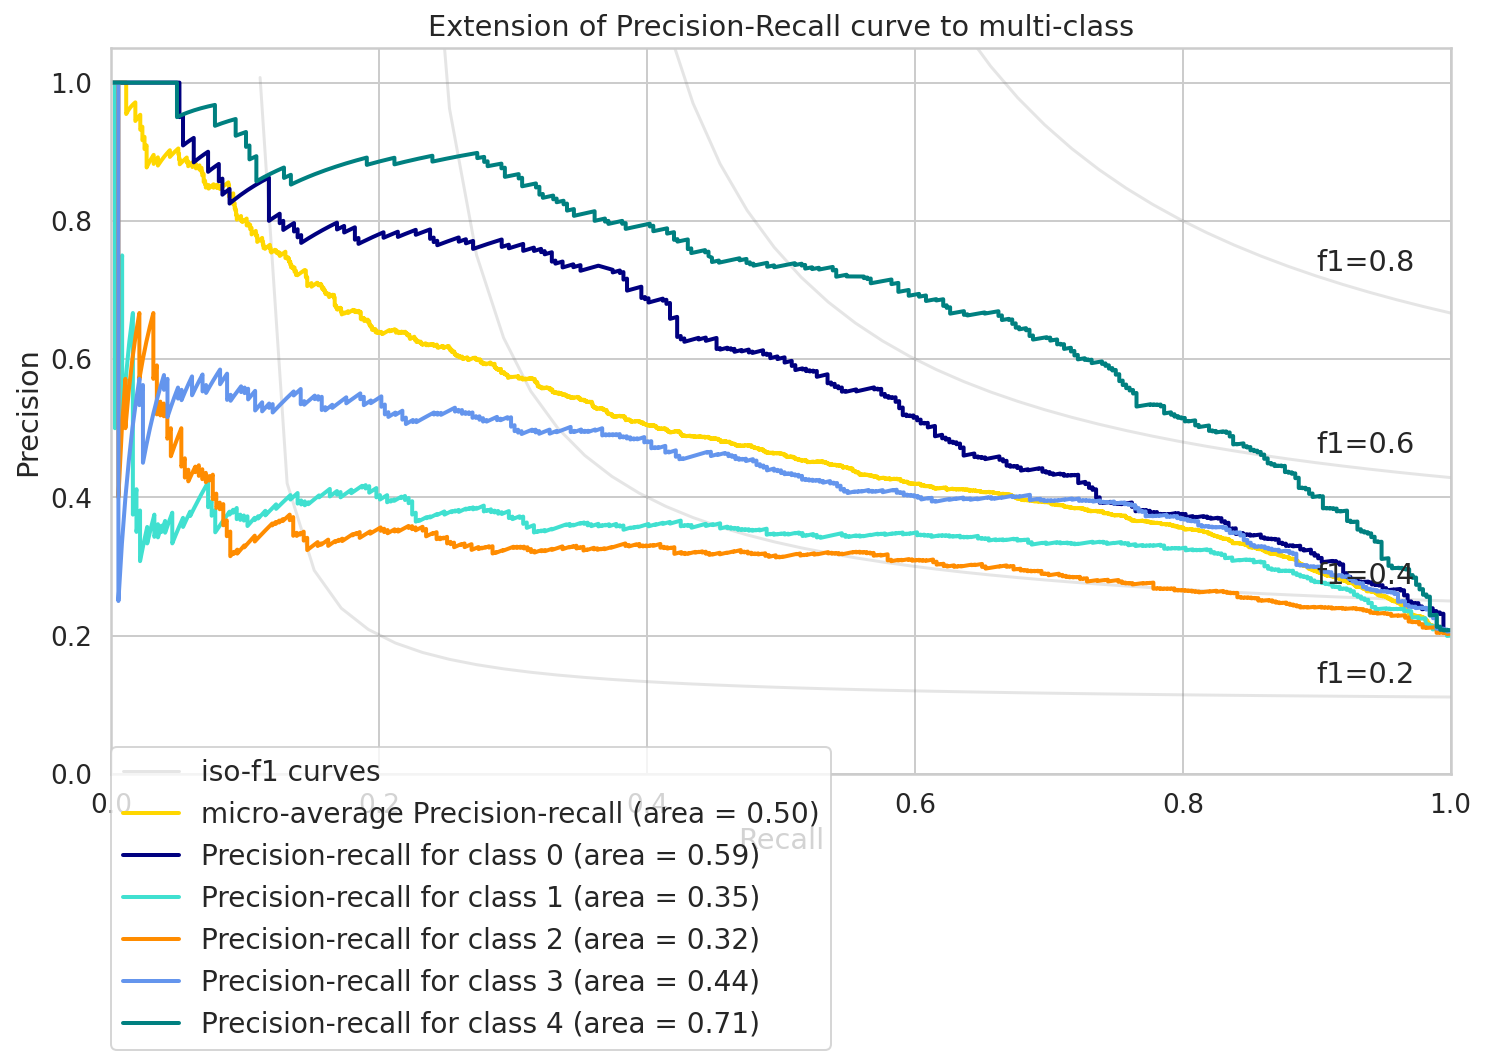

In [ ]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(12, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()
